# Assignment 4: Playing with Frequencies

MIDS W281: Computer Vision

## Recommended Libraries

In [143]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.ndimage import convolve
from utils import *

## Part 1: Hybrid Images

![Hybrid Teaser](objectives/objective1.png)

 ### Overview
 The goal of this part of the assignment is to create [hybrid images](http://olivalab.mit.edu/hybrid_gallery/gallery.html) using the approach described in the SIGGRAPH 2006 [paper](http://olivalab.mit.edu/publications/OlivaTorralb_Hybrid_Siggraph06.pdf) by Oliva, Torralba, and Schyns. Hybrid images are static images that change in interpretation as a function of the viewing distance. The basic idea is that high frequency tends to dominate perception when it is available, but, at a distance, only the low frequency part of the image can be seen. By blending the high-frequency portion of one image with the low-frequency portion of another, you get a hybrid image that leads to different interpretations at different distances.

 ### Description
 You are given a sample image of [Albert Einstein](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_3/al.png) and [Marlyn Monroe](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_3/mm.png). These images are already aligned such that the eyes are at the same location in the images.

 1. Low-pass the image of Albert Einstein. For a low-pass filter, Oliva et al. suggests using a standard 2-D Gaussian filter. The size and sigma of the Gaussian filter can be decided with some experimentation. In the given example, we used a Gaussian filter of size 15 and sigma 8. **Hint: You can use create_2d_gaussian(size, std) function in utils.py to create a 2-D Gaussian filter of a given size and sigma.**  

 2. High-pass filter the image of Marlyn Monroe. For a high-pass filter, the paper suggests using the impulse filter minus the Gaussian filter. This is the same method we used to create a high-pass filter [I - I<sub>b</sub>] in Part 1 of the previous assignment. For computing [I<sub>b</sub>] in this example, we used a Gaussian filter of size 9 and sigma 1.5. You can experiment with these values.  
 
 3. Create a hybrid image by taking the average of the output images in the above two steps.  

### Deliverables:

- Python code creating hybrid images
- The output hybrid image.

In [144]:
# create a function that takes in an two images,  
# uses the create_2d_gaussian method inside the utils script to create a 2D Gaussian filter
# then passes these filters to scipy.ndimage's convolve function
# finally, uses these blurred images to return a hybrid image

def hybrid_image(im1, im2):
    low_pass_filter = create_2d_gaussian(size = 15, std = 8)
    high_pass_filter_b = create_2d_gaussian(size = 9, std = 1.5)
    
    # === process im1 - Einstein image
    im1_low_pass = convolve(im1, low_pass_filter)
    
    # === process im2 - Monroe image
    im2_conv = convolve(im2, high_pass_filter_b)
    im2_high_pass = im2 - im2_conv
    
    # === take average
    hybrid_img = (im1_low_pass + im2_high_pass)/2
    return hybrid_img
 


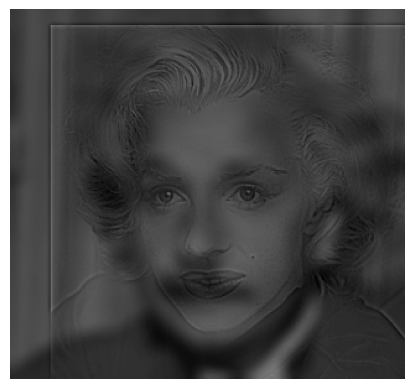

In [145]:
# load in the assignment images
imfile1 ='images/al.png' 
imfile2 = 'images/mm.png'

im1 = plt.imread(imfile1) # low sf
im2 = plt.imread(imfile2) # high 

# hybrid images
# TODO call hybrid_image to return a hybrid image
hybrid = hybrid_image(im1,im2)
# TODO show and save your resultant image
plt.imshow(hybrid, cmap = "gray", vmin=0, vmax=1)
plt.axis(False)
plt.savefig('part1_hybrid_image.png')

## Part 2: Multiresolution Blending (a.k.a. the oraple!)

![Multiresolution Teaser](objectives/objective2.png)

### Overview
The goal of this part of the assignment is to blend two images seamlessly using multi-resolution blending, as described in the 1983 [paper](http://persci.mit.edu/pub_pdfs/spline83.pdf) by Burt and Adelson. In this method, blending occurs at multiple scales so that low-frequency content is blended smoothly over a wide area, and high-frequency content is blended sharply over a narrow area. This is achieved using _image stacks_, which are similar to _image pyramids_. In an image pyramid, for each level of the pyramid the image is downsampled (so that each pyramid level gets smaller and smaller). In a stack, the images for each level are progressively blurred, but not downsampled, so that each pyramid level contains fewer high frequencies but is still of the same size as the original image. Images in a stack can all be saved in one 3D matrix if the original image was grayscale.

### Description

 1. Implement a function that creates Gaussian and Laplacian stacks. To create the successive levels of the Gaussian stack, just apply the Gaussian filter at each level, but do not downsample. The first image in a Gaussian stack is the original image. Therefore, the last image in an n-level stack is an image that is blurred n-1 number of times. For a Laplacian stack, take the difference between the successive levels of the Gaussian stacks. Additonally, the last level of a n-level Laplacian stack is an image blurred n-1 number of times (i.e., the remainder low-frequency information not included in the previous levels). In this project, you must implement your own Gaussian and Laplacian stacks. Do not use the pyrDown or pyrUp functions in Python.  
 ***Hint: Compare your final output image to the provided objective output.  If it does not look correct, consider how you calculate the difference between the successive levels of the Gaussian stack to calculate your Laplacian stack (which level is subtracted from another)***
 
 2. Display the six levels of the Laplacian stack in a single Python plot. Use the output hybrid image from Part 1 for creating the stacks in this deliverable. Notice the first level and the last level of the Laplacian stack. The first level (high frequency) will look like Marlyn Monroe and the last level (low frequency) will look like Albert Einstein. The size and sigma of the Gaussian kernel used for blurring can be the same as in Part 1.
 
 3. Now write code in order to use your Gaussian and Laplacian stacks for blending two images together. For this, we have included the two sample images from the paper (of an [apple](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_3/apple.png) and an [orange](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_3/orange.png)), and a [mask](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_3/mask.png) image. First, create Laplacian stacks for the two input images (six levels is sufficient). Additionally, create a Gaussian stack for your mask. In our example, we used a Gaussian kernel of size 17 and sigma 3. Display the stacks for the two input images and the mask.
 
 4. Create a blended image, B, using the Laplacian stacks of the two images (image X and image Y) and the Gaussian stack of the mask. The intensity of the blended image at location (i,j) can be computed using the following formula,
 
     $$B(i,j)=\sum_{l=1}^{n} [GM_l(i,j) \times LX_l(i,j) + (1 - GM_l(i,j)) \times LY_l(i,j)]$$ 
     
     where $GM_l$, $LX_l$, and $LY_l$ are the $l$ th level of: the Gaussian stack for the mask image, the Laplacian stacks of image X, and the Laplacian stacks of image Y and $n$ is the number of levels in the stack.
 
 5. Finally normalize the image pixels in Image B between 0 and 1 before saving. **Hint: You can use the `normalize_img(img)` function in utils.py**


### Deliverables:

 - Python code for Gaussian and Laplacian stacks
 - Python code for image blending
 - A plot displaying the six levels of Laplacian stacks for the hybrid image
 - Plots displaying the six levels of Laplacian stacks for the two sample images
 - Plots displaying the six levels of Gaussian stacks for the mask image
 - The blended image, B


In [146]:
# stack visualization
def visualize_stack(in_stack, title):
    # set the number of levels
    # create multi-row figure
    # add images to the figure from the stack
    # don't forget to set the cmap, vmin, vmax, and axis off
    # add titles to the plot
    
    # create a figure (2 rows & 3 columns)
    for i,img in enumerate(in_stack):
        # iterate to show the images
        plt.subplot(3,3,i+1)
        plt.imshow(in_stack[i], cmap = "gray")
        plt.axis(False)
    # show the title
    plt.suptitle(title)
    plt.show()

    
# takes in a single channel
def gaussian_and_laplacian_stack(img, levels):
    # create 2D Gaussian
    # for each level
    # apply Gaussian and append to Gaussian stack
    # subtract current from previous Gaussian in stack
    # append result to Laplacian stack
    
    # === define a gaussian filter
    if img.shape[0] != 300:
        gaussian_filter_2D = create_2d_gaussian(size = 15, std = 8) # for part 1 (hybrid image size)
    else:
        gaussian_filter_2D = create_2d_gaussian(size = 17, std = 3) # for part 2
    
    # === guassian stack ====
    guassian_stack_list = [img]
    convolved_img = img
    for i in range(1, levels):
        convolved_img = convolve(convolved_img, gaussian_filter_2D)
        guassian_stack_list.append(convolved_img)
    
    # === laplacian stack ====
    laplacian_stack_list = []
    for idx in range(len(guassian_stack_list)-1):
        lap_img = guassian_stack_list[idx] - guassian_stack_list[idx+1]
        laplacian_stack_list.append(lap_img)
    laplacian_stack_list.append(guassian_stack_list[-1])
    
    # return the outcome
    return guassian_stack_list,laplacian_stack_list


def collapse_laplacian_stack(laplacian_stack):
    # add all the layers of the laplacian stack together
    collapse_img = np.zeros_like(laplacian_stack[0])
    for img in laplacian_stack:
        collapse_img += img
    # return the stacked outcome
    return collapse_img


def create_blended_stack(ls1, ls2, gr):
    # for each level
    # compute a weighted sum of the images in both stacks at that level
    
    # create a B list
    B_list = []
    # Iterate to perform computations
    for idx in range(len(ls1)):
        gm = gr[idx]
        lx = ls1[idx]
        ly = ls2[idx]
        B = gm * lx + (1 - gm) * ly
        B_list.append(B)
    # return B_list
    return B_list


def multires_blending(img1, img2, mask, clip = False):
    # create Gaussian and Laplacian stacks for both images and the mask
    # create blended stack of image Laplacian stacks
    # use mask Gaussian stack as weights
    
    # Derive Gaussian and Laplacian stacks
    img1_gs, img1_ls = gaussian_and_laplacian_stack(img1, 6)
    img2_gs, img2_ls = gaussian_and_laplacian_stack(img2, 6)
    mask_gs, mask_ls = gaussian_and_laplacian_stack(mask, 6)
    # Compute blended stacks
    B_list = create_blended_stack(img1_ls, img2_ls, mask_gs)
    # Collapse together
    B_collapse = collapse_laplacian_stack(B_list)
    
    # return result
    return B_collapse



### Deliverables

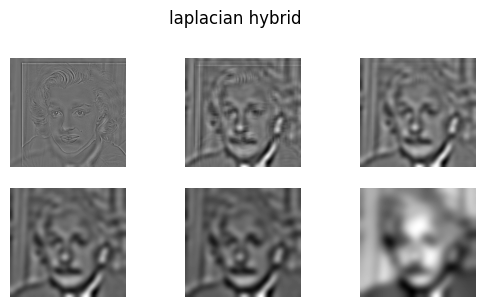

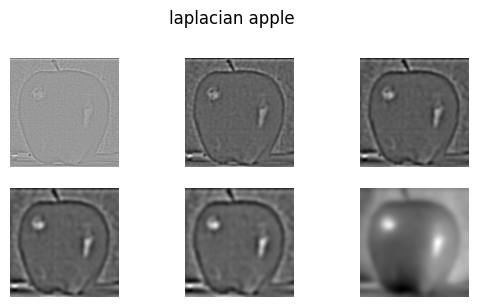

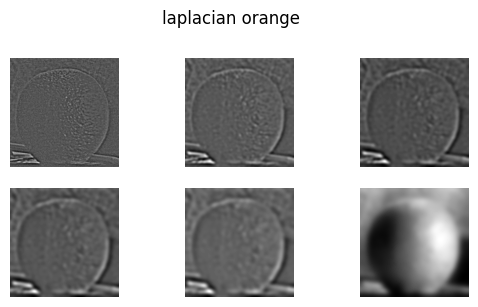

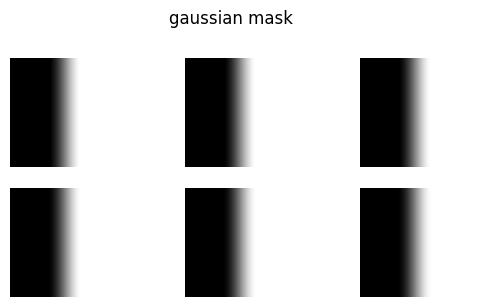

Text(0.5, 1.0, 'blended image')

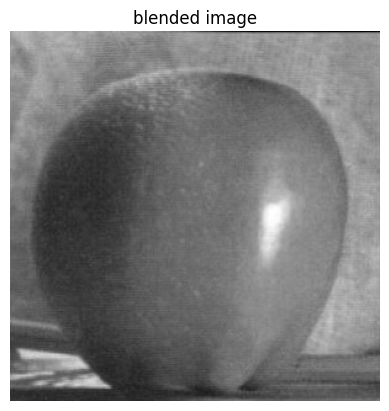

In [147]:
img1 = plt.imread("images/apple.png")
img2 = plt.imread("images/orange.png")
mask = plt.imread("images/mask.png")

# create stacks for hybrid, apple, orange, mask
gs_h, ls_h = gaussian_and_laplacian_stack(hybrid, 6)
gs_a, ls_a = gaussian_and_laplacian_stack(img1, 6)
gs_o, ls_o = gaussian_and_laplacian_stack(img2, 6)
gs_m, _ = gaussian_and_laplacian_stack(mask, 6)

# visualize all the stacks
visualize_stack(ls_h, title='laplacian hybrid')
visualize_stack(ls_a, title='laplacian apple')
visualize_stack(ls_o, title='laplacian orange')
visualize_stack(gs_m, title='gaussian mask')

blended = normalize_img(multires_blending(img1, img2, mask, clip=False))

plt.imsave("out_oraple.png", blended, cmap='gray', vmin=0, vmax=1)

# show the result
plt.imshow(blended,cmap='gray', vmin=0, vmax=1)
plt.axis(False)
plt.title("blended image")

## Acknowledgments
This assignment is inspired from Image Manipulation, Computer Vision and Computational Photography course at EECS UC Berkeley.